In [1]:
import os
import sys
import matplotlib.pyplot as plt

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)
sys.path.insert(0, main_folder)
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'

import pickle 

with open('data/LDS_response_sinFunc.pickle', 'rb') as f:
    test_result = pickle.load(f)

test_result.keys()



/home/sam/Desktop/beh_timescale


dict_keys(['tau', '071323WT_30m_4.2mPeriod', '071323WT_30m_3.3mPeriod', '092123WT_30m_3.5mPeriod', '092123WT_30m_2.9mPeriod', '081823WT_30m_2mPeriod', '081823WT_30m_4mPeriod', '081823WT_30m_3mPeriod', '081123WT_30m_2mPeriod', '081123WT_30m_4mPeriod', '081123WT_30m_3mPeriod', '012724WT_30m_3.2mPeriod', '012724WT_30m_2.95mPeriod', '013024WT_30m_3.4mPeriod', '020224WT_30m_3.4mPeriod', '020224WT_30m_3.25mPeriod', '072123WT_30m_3.1mPeriod', '013024WT_30m_3.6mPeriod', '030824spp1_30m_3.1mPeriod', '030824spp1_30m_3.3mPeriod', '030824spp1_30m_3mPeriod', '031424spp1_30m_3.5mPeriod', '031424spp1_30m_2.8mPeriod', '031424spp1_30m_3mPeriod', '031424ppp1_30m_3.4mPeriod', '031424ppp1_30m_2.7mPeriod', '031424ppp1_30m_3mPeriod', '030824ppp1_30m_2.9mPeriod', '030824ppp1_30m_3.2mPeriod', '030824ppp1_30m_3mPeriod', '031124ppp1_30m_3.1mPeriod', '031124ppp1_30m_3.3mPeriod', '031124ppp1_30m_3mPeriod', '040524ppp1_30m_3.5mPeriod', '040524ppp1_30m_2.8mPeriod', '040524ppp1_30m_3mPeriod', '040524spp1_30m_3.4mPer

# Data Analysis for LDS_sinWave

Data is initally in LDS_sinWave_v3 then compiled to LDS_sinWave

resegmented data using more rigid segmenting (smaller search area = 100) and wont store two of the same locations 
size of tau = 14400 

-**result['tau']:
    Type: numpy.ndarray
    Shape: (14400,)

-**result[experiment_key] (e.g., '071323WT_30m_4.2mPeriod'):
    Type: dict
    Keys:
        'data':
            Type: list of numpy.ndarray
            Each array shape: (n_trials, 14400)
        'stim':
            Type: numpy.ndarray
            Shape: (14400,)

# SineWaves aggregated time trace
2024.04.24 plotting averaged bootstrapped Sine Waves, from the response_sinFunc.pickle


### `response_sin` Function Parameters

This function `response_sin` is designed to compute responses based on sinusoidal or other experimental inputs and plot the results with statistical analysis. 

- **`interest_list`** (`list` of `str`): A list of strings specifying the experiments 

- **`exclude`** (`list` of `str`): A list of strings representing data categories or conditions to be excluded 

- **`periods`** (`list` of `float`, optional): A list of time periods (in minutes) to analyze. Default periods are `[ 3, 4, 5,]`

- **`duration`** (`int`): The duration of each experiment in minutes. Default is 30m

- **`n_boot`** (`float`): The number of bootstrap samples to use for statistical analysis. Default is 1000

- **`statistic`** (`function`, optional): A function to compute the desired statistic during the bootstrap analysis. The default is `np.median`, which calculates the median of the bootstrap samples.

- **`conf_interval`** (`int`): The confidence interval percentage (e.g., 95) for the bootstrap analysis. This defines the certainty level p < 0.05

- **`t_samp`** (`tuple` of `int`): A tuple representing the time sampling window (start, end) for the analysis, given in minutes.


Plotting experiments for interest 'WT' at 3m period with amplitude '32amp':
  - 111822WT_32amp_30m_3mPeriod
  - 022823WT_32amp_30m_3mPeriod


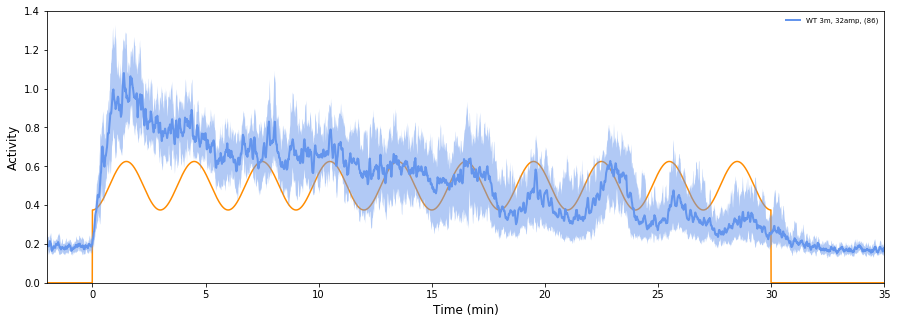

In [3]:
import pickle
import matplotlib.pyplot as plt
from analysis_functions.results_sin_compile import *
%matplotlib inline

result = pickle.load(open('data/LDS_response_sinFunc.pickle', 'rb'))

periods = [3]

interest = ['WT']
duration = '30m'
amplitudes = ['32amp']
exclude = ['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod',
           '051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod','052623WT_30m_4mPeriod',]
#exclude = ['031124ppp1_30m_3mPeriod',]

fig, ax = response_sin(interest, exclude, periods=periods, duration=duration, n_boot=1e3, statistic=np.median, conf_interval=95, t_samp=(-2, 35), amplitudes=amplitudes)
plt.show()

In [5]:
#Save images
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves__3m_64ampVariation.svg')

# SineWaves aggregated time trace with selected periods
2024.04.24 plotting averaged bootstrapped Sine Waves, from the response_sinFunc.pickle


Plotting experiments for interest 'WT' at 3m period with amplitude '127amp':
  - 050923WT_30m_3mPeriod
  - 041823WT_30m_3mPeriod
  - 051624WT_30m_3mPeriod
  - 052024WT_s2_30m_3mPeriod
  - 052824WT_s2_30m_3mPeriod
  - 052424WT_s2_30m_3mPeriod
  - 052024WT_s1_30m_3mPeriod


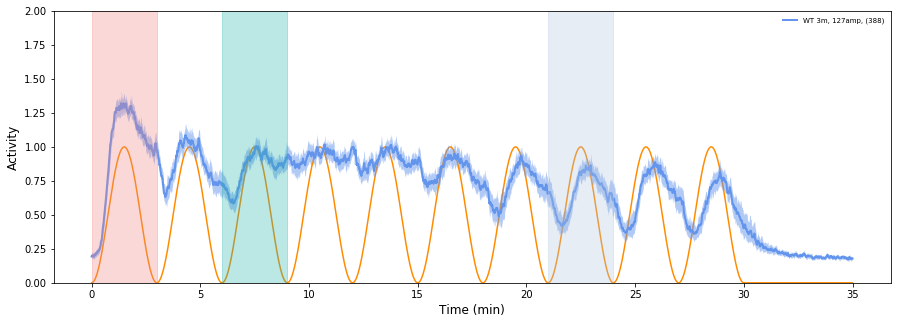

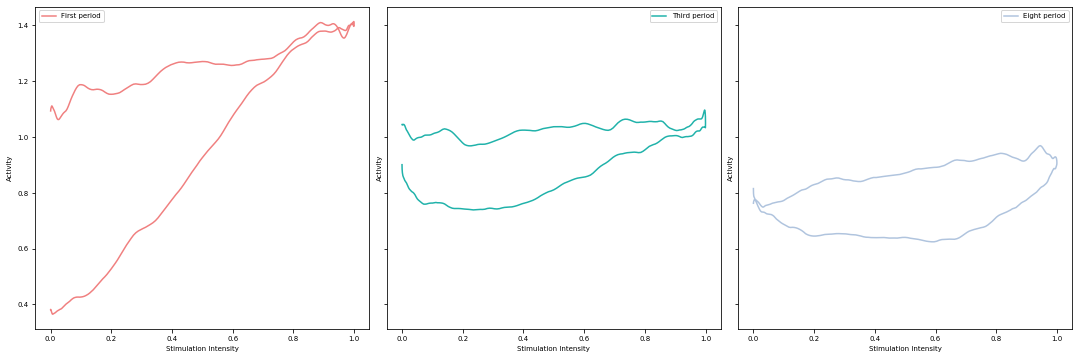

In [3]:
import pickle
import matplotlib.pyplot as plt
from analysis_functions.results_sin_compile import *
%matplotlib inline

result = pickle.load(open('data/LDS_response_sinFunc.pickle', 'rb'))

periods = [3]
interest = ['WT']
duration = '30m'
amplitudes = []
exclude = ['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod',
           '051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod','052623WT_30m_4mPeriod',]

fig_main, ax_main, fig_periods, ax_periods = response_sin_with_extracted_periods(interest, exclude, periods=periods, duration=duration, n_boot=1000, statistic=np.median, conf_interval=95, t_samp=(0, 35), amplitudes=amplitudes)
plt.show()


In [3]:
#Save the figures after displaying them
plt.rcParams['svg.fonttype'] = 'none'
fig_main.savefig('plots/SinWave_3.4_Traces.svg')
fig_periods.savefig('plots/Stimulus_3.4_Response.svg')